In [80]:
import matplotlib
matplotlib.rcParams['font.sans-serif'] = 'Arial Unicode MS'
matplotlib.rcParams['axes.labelsize'] = '15'

import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
import jieba

pd.options.display.max_columns = 30
%matplotlib inline

df = pd.read_csv('queto2.csv')
#df = pd.read_csv('queto.csv')
df.head()
# Get tf-idf matrix using fit_transform function
vectorizer = TfidfVectorizer(tokenizer=jieba.lcut)

In [81]:
%%time
X = vectorizer.fit_transform(df['overview'].values.astype('U')) # Store tf-idf representations of all docs

CPU times: user 26.9 ms, sys: 1.65 ms, total: 28.5 ms
Wall time: 27 ms


In [92]:
query = "历史"

In [93]:
%%time
query_vec = vectorizer.transform([query]) # Ip -- (n_docs,x), Op -- (n_docs,n_Feats)
results = cosine_similarity(X,query_vec).reshape((-1,)) # Op -- (n_docs,1) -- Cosine Sim with each doc
# Print Top 10 results
for i in results.argsort()[-10:][::-1]:
    print(df.iloc[i,0],"--",df.iloc[i,1])

100、如果你能做梦，你就能实现它。——吉格·金克拉 -- nan
nan -- nan
nan -- nan
36、故立志者，为学之心也；为学者，立志之事也。——王阳明 -- nan
nan -- nan
35、古之立大事者，不惟有超世之才，亦必有坚忍不拔之志。——苏轼 -- nan
nan -- nan
34、共同的事业，共同的斗争，可以使人们产生忍受一切的力量。　——奥斯特洛夫斯基 -- nan
nan -- nan
33、感激每一个新的挑战，因为它会锻造你的意志和品格。——佚名 -- nan
CPU times: user 2.62 ms, sys: 880 µs, total: 3.5 ms
Wall time: 2.7 ms


In [ ]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
texts = [
  '翠花买了浅蓝色的鱼',
  '翠花买了浅蓝橙色的鱼',
  '猫在商店吃了一条鱼',
  '翠花去了商店。翠花买了一只虫子。翠花看到一条鱼',
  '它对这个虫子喵喵叫了一声，它现在仍然在对这只虫子和这条鱼喵喵叫',
  '这只猫在鱼店里。这只猫是橙色的。这只猫正在对这条鱼喵喵叫。',
  '翠花是鱼'  
]

In [4]:
list("翠花买了浅蓝色的鱼")
jieba.lcut("翠花买了浅蓝色的鱼")

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/3g/8nt2w5zn7g13q_2cg13_6rrm0000gn/T/jieba.cache
Loading model cost 1.010 seconds.
Prefix dict has been built successfully.


['翠花', '买', '了', '浅蓝色', '的', '鱼']

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(tokenizer=jieba.lcut)
# .fit_transfer TOKENIZES and COUNTS
X = count_vectorizer.fit_transform(texts)

In [9]:
X
X.toarray()

array([[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [2, 1, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 3, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 1, 1, 0, 1, 2, 0, 1, 0, 4, 1, 2, 2, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1],
       [3, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 0,
        0, 3, 0, 1, 0, 0, 0, 3, 0, 1, 2, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]], dtype=int64)

In [12]:
pd.DataFrame(X.toarray())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0
2,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,2,1,0,1,1,2,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,3,1,0,0,0,1,0
4,0,0,1,0,0,1,1,0,1,2,0,1,0,4,1,...,0,0,0,0,0,1,0,0,0,2,1,1,1,1,1
5,3,0,0,0,0,0,0,0,3,1,0,0,0,2,1,...,1,1,0,0,3,0,1,0,0,0,3,0,1,2,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [14]:
# Penny is a fish
# A fish is Penny
count_vectorizer.get_feature_names()
pd.DataFrame(X.toarray(), columns=count_vectorizer.get_feature_names())

,。,一只,一声,一条,买,了,仍然,去,只,叫,吃,和,商店,喵,在,...,橙色,正在,浅蓝,浅蓝色,猫,现在,的,看到,翠花,虫子,这,这个,这条,鱼,，
0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0
2,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,2,1,0,1,1,2,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,3,1,0,0,0,1,0
4,0,0,1,0,0,1,1,0,1,2,0,1,0,4,1,...,0,0,0,0,0,1,0,0,0,2,1,1,1,1,1
5,3,0,0,0,0,0,0,0,3,1,0,0,0,2,1,...,1,1,0,0,3,0,1,0,0,0,3,0,1,2,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [15]:
chinese_stopwords = ["、","。","〈","〉","《","》","一","一些","一何","一切","一则","一方面","一旦","一来","一样","一般","一转眼","七","万一","三","上","上下","下","不","不仅","不但","不光","不单","不只","不外乎","不如","不妨","不尽","不尽然","不得","不怕","不惟","不成","不拘","不料","不是","不比","不然","不特","不独","不管","不至于","不若","不论","不过","不问","与","与其","与其说","与否","与此同时","且","且不说","且说","两者","个","个别","中","临","为","为了","为什么","为何","为止","为此","为着","乃","乃至","乃至于","么","之","之一","之所以","之类","乌乎","乎","乘","九","也","也好","也罢","了","二","二来","于","于是","于是乎","云云","云尔","五","些","亦","人","人们","人家","什","什么","什么样","今","介于","仍","仍旧","从","从此","从而","他","他人","他们","他们们","以","以上","以为","以便","以免","以及","以故","以期","以来","以至","以至于","以致","们","任","任何","任凭","会","似的","但","但凡","但是","何","何以","何况","何处","何时","余外","作为","你","你们","使","使得","例如","依","依据","依照","便于","俺","俺们","倘","倘使","倘或","倘然","倘若","借","借傥然","假使","假如","假若","做","像","儿","先不先","光是","全体","全部","八","六","兮","共","关于","关于具体地说","其","其一","其中","其二","其他","其余","其它","其次","具体地说","具体说来","兼之","内","再","再其次","再则","再有","再者","再者说","再说","冒","冲","况且","几","几时","凡","凡是","凭","凭借","出于","出来","分","分别","则","则甚","别","别人","别处","别是","别的","别管","别说","到","前后","前此","前者","加之","加以","即","即令","即使","即便","即如","即或","即若","却","去","又","又及","及","及其","及至","反之","反而","反过来","反过来说","受到","另","另一方面","另外","另悉","只","只当","只怕","只是","只有","只消","只要","只限","叫","叮咚","可","可以","可是","可见","各","各个","各位","各种","各自","同","同时","后","后者","向","向使","向着","吓","吗","否则","吧","吧哒","含","吱","呀","呃","呕","呗","呜","呜呼","呢","呵","呵呵","呸","呼哧","咋","和","咚","咦","咧","咱","咱们","咳","哇","哈","哈哈","哉","哎","哎呀","哎哟","哗","哟","哦","哩","哪","哪个","哪些","哪儿","哪天","哪年","哪怕","哪样","哪边","哪里","哼","哼唷","唉","唯有","啊","啐","啥","啦","啪达","啷当","喂","喏","喔唷","喽","嗡","嗡嗡","嗬","嗯","嗳","嘎","嘎登","嘘","嘛","嘻","嘿","嘿嘿","四","因","因为","因了","因此","因着","因而","固然","在","在下","在于","地","基于","处在","多","多么","多少","大","大家","她","她们","好","如","如上","如上所述","如下","如何","如其","如同","如是","如果","如此","如若","始而","孰料","孰知","宁","宁可","宁愿","宁肯","它","它们","对","对于","对待","对方","对比","将","小","尔","尔后","尔尔","尚且","就","就是","就是了","就是说","就算","就要","尽","尽管","尽管如此","岂但","己","已","已矣","巴","巴巴","年","并","并且","庶乎","庶几","开外","开始","归","归齐","当","当地","当然","当着","彼","彼时","彼此","往","待","很","得","得了","怎","怎么","怎么办","怎么样","怎奈","怎样","总之","总的来看","总的来说","总的说来","总而言之","恰恰相反","您","惟其","慢说","我","我们","或","或则","或是","或曰","或者","截至","所","所以","所在","所幸","所有","才","才能","打","打从","把","抑或","拿","按","按照","换句话说","换言之","据","据此","接着","故","故此","故而","旁人","无","无宁","无论","既","既往","既是","既然","日","时","时候","是","是以","是的","更","曾","替","替代","最","月","有","有些","有关","有及","有时","有的","望","朝","朝着","本","本人","本地","本着","本身","来","来着","来自","来说","极了","果然","果真","某","某个","某些","某某","根据","欤","正值","正如","正巧","正是","此","此地","此处","此外","此时","此次","此间","毋宁","每","每当","比","比及","比如","比方","没奈何","沿","沿着","漫说","焉","然则","然后","然而","照","照着","犹且","犹自","甚且","甚么","甚或","甚而","甚至","甚至于","用","用来","由","由于","由是","由此","由此可见","的","的确","的话","直到","相对而言","省得","看","眨眼","着","着呢","矣","矣乎","矣哉","离","秒","竟而","第","等","等到","等等","简言之","管","类如","紧接着","纵","纵令","纵使","纵然","经","经过","结果","给","继之","继后","继而","综上所述","罢了","者","而","而且","而况","而后","而外","而已","而是","而言","能","能否","腾","自","自个儿","自从","自各儿","自后","自家","自己","自打","自身","至","至于","至今","至若","致","般的","若","若夫","若是","若果","若非","莫不然","莫如","莫若","虽","虽则","虽然","虽说","被","要","要不","要不是","要不然","要么","要是","譬喻","譬如","让","许多","论","设使","设或","设若","诚如","诚然","该","说","说来","请","诸","诸位","诸如","谁","谁人","谁料","谁知","贼死","赖以","赶","起","起见","趁","趁着","越是","距","跟","较","较之","边","过","还","还是","还有","还要","这","这一来","这个","这么","这么些","这么样","这么点儿","这些","这会儿","这儿","这就是说","这时","这样","这次","这般","这边","这里","进而","连","连同","逐步","通过","遵循","遵照","那","那个","那么","那么些","那么样","那些","那会儿","那儿","那时","那样","那般","那边","那里","都","鄙人","鉴于","针对","阿","除","除了","除外","除开","除此之外","除非","随","随后","随时","随着","难道说","零","非","非但","非徒","非特","非独","靠","顺","顺着","首先","︿","！","＃","＄","％","＆","（","）","＊","＋","，","０","１","２","３","４","５","６","７","８","９","：","；","＜","＞","？","＠","［","］","｛","｜","｝","～","￥"]

In [16]:
# We'll make a new vectorizer
count_vectorizer = CountVectorizer(stop_words=chinese_stopwords, tokenizer=jieba.lcut)
#count_vectorizer = CountVectorizer(stop_words=['the', 'and'])
# .fit_transfer TOKENIZES and COUNTS
X = count_vectorizer.fit_transform(texts)
print(count_vectorizer.get_feature_names())

['一只', '一声', '一条', '买', '仍然', '吃', '商店', '喵', '店里', '橙色', '正在', '浅蓝', '浅蓝色', '猫', '现在', '看到', '翠花', '虫子', '这条', '鱼']


In [63]:
query = "浅蓝"

In [64]:
%%time
query_vec = vectorizer.transform([query]) # Ip -- (n_docs,x), Op -- (n_docs,n_Feats)
results = cosine_similarity(X,query_vec).reshape((-1,)) # Op -- (n_docs,1) -- Cosine Sim with each doc

CPU times: user 1.34 ms, sys: 72 µs, total: 1.42 ms
Wall time: 1.35 ms


In [65]:
# Print Top 10 results
for i in results.argsort()[-10:][::-1]:
    print(df.iloc[i,0],"--",df.iloc[i,1])
    print(texts[i])
    
print(results)

0.0 -- 0.0
我不吃鱼我不吃猫我只吃虫子
0.0 -- 1.0
翠花是鱼翠花翠花她喜欢鱼翠花翠花不是猫商店现在关了那棵树多少岁
0.8826107121780495 -- 0.0
这只猫在鱼店里。这只猫是橙色的。这只猫正在对这条鱼喵喵叫
0.9912507320720584 -- 0.0
它对这个虫子喵喵叫了一声，它现在仍然在对这只虫子和这条鱼喵喵叫
0.0 -- 0.97355404084069
翠花去商店。翠花买了一只虫子。翠花看到一条鱼
0.0 -- 0.0
猫在商店吃了一条鱼
0.0 -- 0.8176969280145123
翠花买了浅蓝橙色的鱼
0.0 -- 0.8176969280145123
翠花买了浅蓝色的鱼
[0. 0. 0. 0. 0. 0. 0. 0.]


In [17]:
pd.DataFrame(X.toarray(), columns=count_vectorizer.get_feature_names())

,一只,一声,一条,买,仍然,吃,商店,喵,店里,橙色,正在,浅蓝,浅蓝色,猫,现在,看到,翠花,虫子,这条,鱼
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1
2,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,3,1,0,1
4,0,1,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,2,1,1
5,0,0,0,0,0,0,0,2,1,1,1,0,0,3,0,0,0,0,1,2
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words=chinese_stopwords, tokenizer=jieba.lcut, use_idf=False, norm='l1')
X = tfidf_vectorizer.fit_transform(texts)
pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names())

,一只,一声,一条,买,仍然,吃,商店,喵,店里,橙色,正在,浅蓝,浅蓝色,猫,现在,看到,翠花,虫子,这条,鱼
0,0.0,0.000000,0.0,0.25,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.25,0.000000,0.000000,0.0,0.25,0.000000,0.000000,0.250000
1,0.0,0.000000,0.0,0.20,0.000000,0.0,0.0,0.000000,0.000000,0.200000,0.000000,0.2,0.00,0.000000,0.000000,0.0,0.20,0.000000,0.000000,0.200000
2,0.0,0.000000,0.2,0.00,0.000000,0.2,0.2,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.200000,0.000000,0.0,0.00,0.000000,0.000000,0.200000
3,0.1,0.000000,0.1,0.10,0.000000,0.0,0.1,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.1,0.30,0.100000,0.000000,0.100000
4,0.0,0.090909,0.0,0.00,0.090909,0.0,0.0,0.363636,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.090909,0.0,0.00,0.181818,0.090909,0.090909
5,0.0,0.000000,0.0,0.00,0.000000,0.0,0.0,0.181818,0.090909,0.090909,0.090909,0.0,0.00,0.272727,0.000000,0.0,0.00,0.000000,0.090909,0.181818
6,0.0,0.000000,0.0,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.50,0.000000,0.000000,0.500000


In [20]:
def tokenize(sentence):
    without_duplicates = re.sub(r'(.)\1+', r'\1\1', sentence)
    without_punctuation = re.sub(r'[^\w]','',without_duplicates)
    return jieba.lcut(without_duplicates)

tfidf_vectorizer = TfidfVectorizer(stop_words=chinese_stopwords, tokenizer=tokenize, use_idf=False, norm='l1')
X = tfidf_vectorizer.fit_transform(texts)
df = pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names())
df

,一只,一声,一条,买,仍然,吃,商店,喵,店里,橙色,正在,浅蓝,浅蓝色,猫,现在,看到,翠花,虫子,这条,鱼
0,0.0,0.000000,0.0,0.25,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.25,0.000000,0.000000,0.0,0.25,0.000000,0.000000,0.250000
1,0.0,0.000000,0.0,0.20,0.000000,0.0,0.0,0.000000,0.000000,0.200000,0.000000,0.2,0.00,0.000000,0.000000,0.0,0.20,0.000000,0.000000,0.200000
2,0.0,0.000000,0.2,0.00,0.000000,0.2,0.2,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.200000,0.000000,0.0,0.00,0.000000,0.000000,0.200000
3,0.1,0.000000,0.1,0.10,0.000000,0.0,0.1,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.1,0.30,0.100000,0.000000,0.100000
4,0.0,0.090909,0.0,0.00,0.090909,0.0,0.0,0.363636,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.090909,0.0,0.00,0.181818,0.090909,0.090909
5,0.0,0.000000,0.0,0.00,0.000000,0.0,0.0,0.181818,0.090909,0.090909,0.090909,0.0,0.00,0.272727,0.000000,0.0,0.00,0.000000,0.090909,0.181818
6,0.0,0.000000,0.0,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.50,0.000000,0.000000,0.500000


In [21]:
# Just add the columns together
pd.DataFrame([df['鱼'], df['喵'], df['鱼'] + df['喵']], index=["鱼", "喵", "鱼 + 喵"]).T

,鱼,喵,鱼 + 喵
0,0.250000,0.000000,0.250000
1,0.200000,0.000000,0.200000
2,0.200000,0.000000,0.200000
3,0.100000,0.000000,0.100000
4,0.090909,0.363636,0.454545
5,0.181818,0.181818,0.363636
6,0.500000,0.000000,0.500000


In [22]:
# use_idf=True is default, but I'll leave it in
idf_vectorizer = TfidfVectorizer(stop_words=chinese_stopwords, tokenizer=tokenize, use_idf=True, norm='l1')
X = idf_vectorizer.fit_transform(texts)
idf_df = pd.DataFrame(X.toarray(), columns=idf_vectorizer.get_feature_names())
idf_df

,一只,一声,一条,买,仍然,吃,商店,喵,店里,橙色,正在,浅蓝,浅蓝色,猫,现在,看到,翠花,虫子,这条,鱼
0,0.000000,0.000000,0.000000,0.258518,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.364351,0.000000,0.000000,0.000000,0.224447,0.000000,0.000000,0.152685
1,0.000000,0.000000,0.000000,0.198487,0.000000,0.000000,0.000000,0.000000,0.000000,0.232212,0.000000,0.279744,0.000000,0.000000,0.000000,0.000000,0.172328,0.000000,0.000000,0.117230
2,0.000000,0.000000,0.212335,0.000000,0.000000,0.255799,0.212335,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.212335,0.000000,0.000000,0.000000,0.000000,0.000000,0.107195
3,0.133924,0.000000,0.111169,0.095023,0.000000,0.000000,0.111169,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.133924,0.247500,0.111169,0.000000,0.056122
4,0.000000,0.108346,0.000000,0.000000,0.108346,0.000000,0.000000,0.359747,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.108346,0.000000,0.000000,0.179874,0.089937,0.045404
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.191956,0.115624,0.095978,0.115624,0.000000,0.000000,0.287934,0.000000,0.000000,0.000000,0.000000,0.095978,0.096907
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.595142,0.000000,0.000000,0.404858


In [23]:
# OLD dataframe
pd.DataFrame([df['鱼'], df['喵'], df['鱼'] + df['喵']], index=["鱼", "喵", "鱼 + 喵"]).T

,鱼,喵,鱼 + 喵
0,0.250000,0.000000,0.250000
1,0.200000,0.000000,0.200000
2,0.200000,0.000000,0.200000
3,0.100000,0.000000,0.100000
4,0.090909,0.363636,0.454545
5,0.181818,0.181818,0.363636
6,0.500000,0.000000,0.500000


In [24]:
# NEW dataframe
pd.DataFrame([idf_df['鱼'], idf_df['喵'], idf_df['鱼'] + idf_df['喵']], index=["鱼", "喵", "鱼 + 喵"]).T

,鱼,喵,鱼 + 喵
0,0.152685,0.000000,0.152685
1,0.117230,0.000000,0.117230
2,0.107195,0.000000,0.107195
3,0.056122,0.000000,0.056122
4,0.045404,0.359747,0.405151
5,0.096907,0.191956,0.288863
6,0.404858,0.000000,0.404858


In [25]:
# use_idf=True is default, but I'll leave it in
l2_vectorizer = TfidfVectorizer(stop_words=chinese_stopwords, tokenizer=tokenize, use_idf=True)
X = l2_vectorizer.fit_transform(texts)
l2_df = pd.DataFrame(X.toarray(), columns=l2_vectorizer.get_feature_names())
l2_df

,一只,一声,一条,买,仍然,吃,商店,喵,店里,橙色,正在,浅蓝,浅蓝色,猫,现在,看到,翠花,虫子,这条,鱼
0,0.000000,0.000000,0.000000,0.494530,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.696983,0.000000,0.000000,0.000000,0.429355,0.000000,0.000000,0.292077
1,0.000000,0.000000,0.000000,0.428052,0.000000,0.000000,0.000000,0.000000,0.000000,0.500782,0.000000,0.60329,0.000000,0.000000,0.000000,0.000000,0.371638,0.000000,0.000000,0.252814
2,0.000000,0.000000,0.460964,0.000000,0.000000,0.555321,0.460964,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.460964,0.000000,0.000000,0.000000,0.000000,0.000000,0.232713
3,0.350038,0.000000,0.290562,0.248362,0.000000,0.000000,0.290562,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.350038,0.646891,0.290562,0.000000,0.146687
4,0.000000,0.238058,0.000000,0.000000,0.238058,0.000000,0.000000,0.790435,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.238058,0.000000,0.000000,0.395217,0.197609,0.099761
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.459776,0.276945,0.229888,0.276945,0.00000,0.000000,0.689664,0.000000,0.000000,0.000000,0.000000,0.229888,0.232113
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.826823,0.000000,0.000000,0.562463


In [26]:
# normal TF-IDF dataframe
pd.DataFrame([idf_df['鱼'], idf_df['喵'], idf_df['鱼'] + idf_df['喵']], index=["鱼", "喵", "鱼 + 喵"]).T

,鱼,喵,鱼 + 喵
0,0.152685,0.000000,0.152685
1,0.117230,0.000000,0.117230
2,0.107195,0.000000,0.107195
3,0.056122,0.000000,0.056122
4,0.045404,0.359747,0.405151
5,0.096907,0.191956,0.288863
6,0.404858,0.000000,0.404858


In [27]:
# L2 norm TF-IDF dataframe
pd.DataFrame([l2_df['鱼'], l2_df['喵'], l2_df['鱼'] + l2_df['喵']], index=["鱼", "喵", "鱼 + 喵"]).T

,鱼,喵,鱼 + 喵
0,0.292077,0.000000,0.292077
1,0.252814,0.000000,0.252814
2,0.232713,0.000000,0.232713
3,0.146687,0.000000,0.146687
4,0.099761,0.790435,0.890195
5,0.232113,0.459776,0.691889
6,0.562463,0.000000,0.562463


In [28]:
# Initialize a vectorizer
vectorizer = TfidfVectorizer(use_idf=True, stop_words=chinese_stopwords, tokenizer=tokenize)
X = vectorizer.fit_transform(texts)

In [30]:
X
pd.DataFrame(X.toarray())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,0.000000,0.000000,0.494530,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.696983,0.000000,0.000000,0.000000,0.429355,0.000000,0.000000,0.292077
1,0.000000,0.000000,0.000000,0.428052,0.000000,0.000000,0.000000,0.000000,0.000000,0.500782,0.000000,0.60329,0.000000,0.000000,0.000000,0.000000,0.371638,0.000000,0.000000,0.252814
2,0.000000,0.000000,0.460964,0.000000,0.000000,0.555321,0.460964,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.460964,0.000000,0.000000,0.000000,0.000000,0.000000,0.232713
3,0.350038,0.000000,0.290562,0.248362,0.000000,0.000000,0.290562,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.350038,0.646891,0.290562,0.000000,0.146687
4,0.000000,0.238058,0.000000,0.000000,0.238058,0.000000,0.000000,0.790435,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.238058,0.000000,0.000000,0.395217,0.197609,0.099761
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.459776,0.276945,0.229888,0.276945,0.00000,0.000000,0.689664,0.000000,0.000000,0.000000,0.000000,0.229888,0.232113
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.826823,0.000000,0.000000,0.562463


In [31]:
# KMeans clustering is a method of clustering.
from sklearn.cluster import KMeans

number_of_clusters = 2
km = KMeans(n_clusters=number_of_clusters)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [32]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: 翠花 鱼 买 浅蓝色 浅蓝
Cluster 1: 喵 猫 鱼 吃 商店


In [33]:
km.labels_

array([0, 0, 1, 0, 1, 1, 0], dtype=int32)

In [34]:
texts

['翠花买了浅蓝色的鱼',
 '翠花买了浅蓝橙色的鱼',
 '猫在商店吃了一条鱼',
 '翠花去了商店。翠花买了一只虫子。翠花看到一条鱼',
 '它对这个虫子喵喵叫了一声，它现在仍然在对这只虫子和这条鱼喵喵叫',
 '这只猫在鱼店里。这只猫是橙色的。这只猫正在对这条鱼喵喵叫。',
 '翠花是鱼']

In [35]:
results = pd.DataFrame()
results['text'] = texts
results['category'] = km.labels_
results

,text,category
0,翠花买了浅蓝色的鱼,0
1,翠花买了浅蓝橙色的鱼,0
2,猫在商店吃了一条鱼,1
3,翠花去了商店。翠花买了一只虫子。翠花看到一条鱼,0
4,它对这个虫子喵喵叫了一声，它现在仍然在对这只虫子和这条鱼喵喵叫,1
5,这只猫在鱼店里。这只猫是橙色的。这只猫正在对这条鱼喵喵叫。,1
6,翠花是鱼,0


In [36]:
from sklearn.cluster import KMeans

number_of_clusters = 3
km = KMeans(n_clusters=number_of_clusters)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [37]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: 翠花 鱼 买 浅蓝色 浅蓝
Cluster 1: 喵 猫 这条 虫子 鱼
Cluster 2: 吃 一条 猫 商店 鱼


In [38]:
results = pd.DataFrame()
results['text'] = texts
results['category'] = km.labels_
results

,text,category
0,翠花买了浅蓝色的鱼,0
1,翠花买了浅蓝橙色的鱼,0
2,猫在商店吃了一条鱼,2
3,翠花去了商店。翠花买了一只虫子。翠花看到一条鱼,0
4,它对这个虫子喵喵叫了一声，它现在仍然在对这只虫子和这条鱼喵喵叫,1
5,这只猫在鱼店里。这只猫是橙色的。这只猫正在对这条鱼喵喵叫。,1
6,翠花是鱼,0


In [39]:
texts = [  
    '翠花买了浅蓝色的鱼',
    '翠花买了浅蓝橙色的鱼',
    '猫在商店吃了一条鱼',
    '翠花去商店。翠花买了一只虫子。翠花看到一条鱼',
    '它对这个虫子喵喵叫了一声，它现在仍然在对这只虫子和这条鱼喵喵叫',
    '这只猫在鱼店里。这只猫是橙色的。这只猫正在对这条鱼喵喵叫',
    '翠花是鱼'  
    '翠花翠花她喜欢鱼翠花翠花不是猫'
    '商店现在关了'
    '那棵树多少岁',
    '我不吃鱼我不吃猫我只吃虫子'
]


# Initialize a vectorizer
vectorizer = TfidfVectorizer(use_idf=True, max_features=2, tokenizer=tokenize, stop_words=chinese_stopwords)
X = vectorizer.fit_transform(texts)

In [40]:
vectorizer.get_feature_names()

['翠花', '鱼']

In [41]:
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
df

,翠花,鱼
0,0.817697,0.575649
1,0.817697,0.575649
2,0.000000,1.000000
3,0.973554,0.228457
4,0.000000,1.000000
5,0.000000,1.000000
6,1.000000,0.000000
7,0.000000,1.000000


Text(0, 0.5, '鱼')

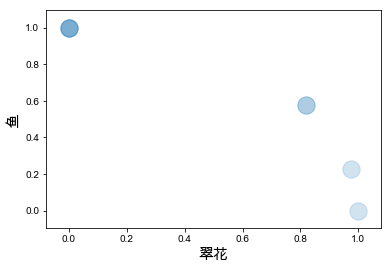

In [42]:
ax = df.plot(kind='scatter', x='翠花', y='鱼', alpha=0.2, s=300)
ax.set_xlabel("翠花")
ax.set_ylabel("鱼")

In [43]:
from sklearn.cluster import KMeans

number_of_clusters = 3
km = KMeans(n_clusters=number_of_clusters)
km.fit(X)
df['category'] = km.labels_

In [44]:
df

,翠花,鱼,category
0,0.817697,0.575649,2
1,0.817697,0.575649,2
2,0.000000,1.000000,0
3,0.973554,0.228457,1
4,0.000000,1.000000,0
5,0.000000,1.000000,0
6,1.000000,0.000000,1
7,0.000000,1.000000,0


Text(0, 0.5, '鱼')

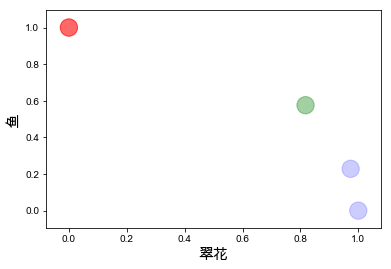

In [45]:
color_list = ['r', 'b', 'g', 'y']
colors = [color_list[i] for i in df['category']]

ax = df.plot(kind='scatter', x='翠花', y='鱼', alpha=0.2, s=300, c=colors)
ax.set_xlabel("翠花")
ax.set_ylabel("鱼")

In [46]:
# Initialize a vectorizer
vectorizer = TfidfVectorizer(use_idf=True, max_features=3, tokenizer=tokenize, stop_words=chinese_stopwords)
X = vectorizer.fit_transform(texts)

In [47]:
vectorizer.get_feature_names()

['喵', '翠花', '鱼']

In [48]:
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
df

,喵,翠花,鱼
0,0.000000,0.817697,0.575649
1,0.000000,0.817697,0.575649
2,0.000000,0.000000,1.000000
3,0.000000,0.973554,0.228457
4,0.991251,0.000000,0.131992
5,0.882611,0.000000,0.470105
6,0.000000,1.000000,0.000000
7,0.000000,0.000000,1.000000


In [49]:
from sklearn.cluster import KMeans

number_of_clusters = 4
km = KMeans(n_clusters=number_of_clusters)
km.fit(X)
df['category'] = km.labels_

In [50]:
df['text'] = texts
df

,喵,翠花,鱼,category,text
0,0.000000,0.817697,0.575649,0,翠花买了浅蓝色的鱼
1,0.000000,0.817697,0.575649,0,翠花买了浅蓝橙色的鱼
2,0.000000,0.000000,1.000000,2,猫在商店吃了一条鱼
3,0.000000,0.973554,0.228457,3,翠花去商店。翠花买了一只虫子。翠花看到一条鱼
4,0.991251,0.000000,0.131992,1,它对这个虫子喵喵叫了一声，它现在仍然在对这只虫子和这条鱼喵喵叫
5,0.882611,0.000000,0.470105,1,这只猫在鱼店里。这只猫是橙色的。这只猫正在对这条鱼喵喵叫
6,0.000000,1.000000,0.000000,3,翠花是鱼翠花翠花她喜欢鱼翠花翠花不是猫商店现在关了那棵树多少岁
7,0.000000,0.000000,1.000000,2,我不吃鱼我不吃猫我只吃虫子


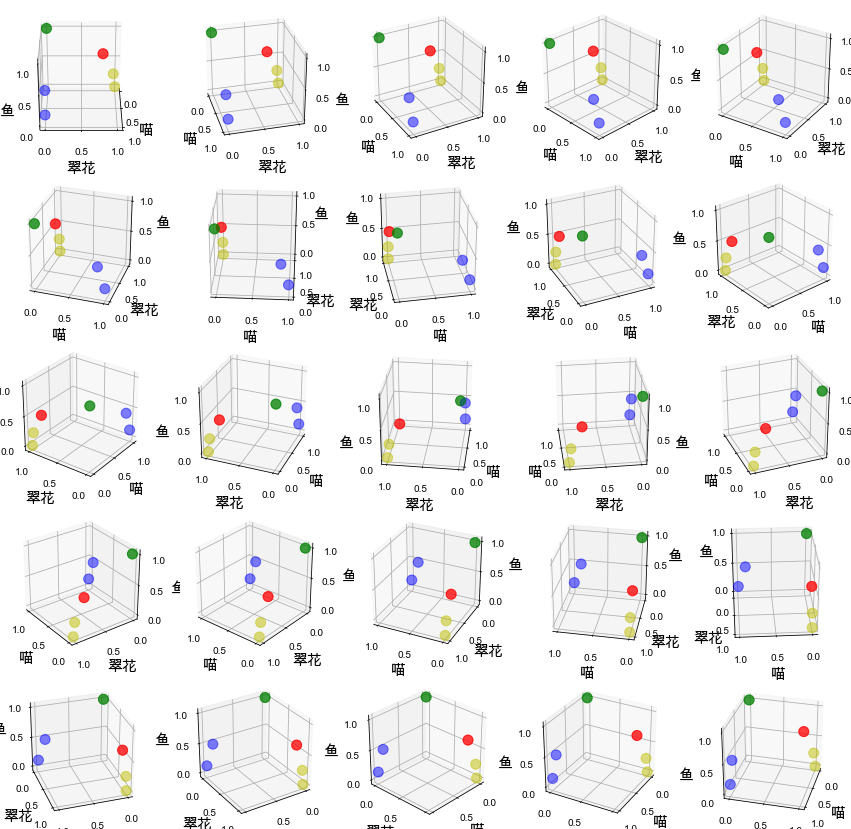

In [51]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def draw(ax, df):
    color_list = ['r', 'b', 'g', 'y']
    colors = [color_list[i] for i in df['category']]

    marker_list = ['o', 'x', 'v', 'X']
    markers = [marker_list[i] for i in df['category']]
    features = vectorizer.get_feature_names()
    
    ax.scatter(df[features[0]], df[features[1]], df[features[2]], c=colors, s=100, alpha=0.5)
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])
    ax.set_zlabel(features[2])

chart_count_vert = 5
chart_count_horiz = 5
number_of_graphs = chart_count_vert * chart_count_horiz

fig = plt.figure(figsize=(3 * chart_count_horiz, 3 * chart_count_vert))

for i in range(number_of_graphs):
    ax = fig.add_subplot(chart_count_horiz, chart_count_vert, i + 1, projection='3d', azim=(-360 / number_of_graphs) * i)
    draw(ax, df)